# Import libraries



In [ ]:
!pip install split-folders
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-9pca05i7
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-9pca05i7
  Resolved https://github.com/tensorflow/docs to commit 35eceb1a5f10dff95940417fe2ad691f3e6aa08e
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2023.10.27.81990-py3-none-any.whl size=184142 sha256=7e034c039ff6977826a51f8f5cc6fa5a8a9964985cb4f337bcb710bbcad009bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-f2hq2ekf/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
# import requirement libraries and tools
import os
import pathlib
import itertools
import splitfolders
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




In [ ]:
# To enable dynamic memory allocation, run the following commands
# at the start of the session :
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Import Dataset


In [ ]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

In [ ]:
data_path = '/content/Rice_Image_Dataset'
data_path = pathlib.Path(data_path)

In [ ]:
data_images=[]
data_labels=[]
for i in os.listdir(data_path):
    full_path=os.path.join(data_path, i) # Corrected here
    if(os.path.isdir(full_path)):
        for rice_image in os.listdir(full_path):
            data_images.append(os.path.join(full_path, rice_image)) # Corrected here
            data_labels.append(i)

In [ ]:
df=pd.DataFrame({"label":data_labels,"image":data_images})
df.head()

,label,image
0,Arborio,/content/Rice_Image_Dataset/Arborio/Arborio (1...
1,Arborio,/content/Rice_Image_Dataset/Arborio/Arborio (1...
2,Arborio,/content/Rice_Image_Dataset/Arborio/Arborio (1...
3,Arborio,/content/Rice_Image_Dataset/Arborio/Arborio (1...
4,Arborio,/content/Rice_Image_Dataset/Arborio/Arborio (5...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   75000 non-null  object
 1   image   75000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
df.nunique()

label        5
image    75000
dtype: int64

In [ ]:
df_num=df.value_counts(subset="label").reset_index()
df_num.columns= ['label','count']
df_num

,label,count
0,Arborio,15000
1,Basmati,15000
2,Ipsala,15000
3,Jasmine,15000
4,Karacadag,15000


In [ ]:
df_num.head()

,label,count
0,Arborio,15000
1,Basmati,15000
2,Ipsala,15000
3,Jasmine,15000
4,Karacadag,15000


# Diagrama de barras

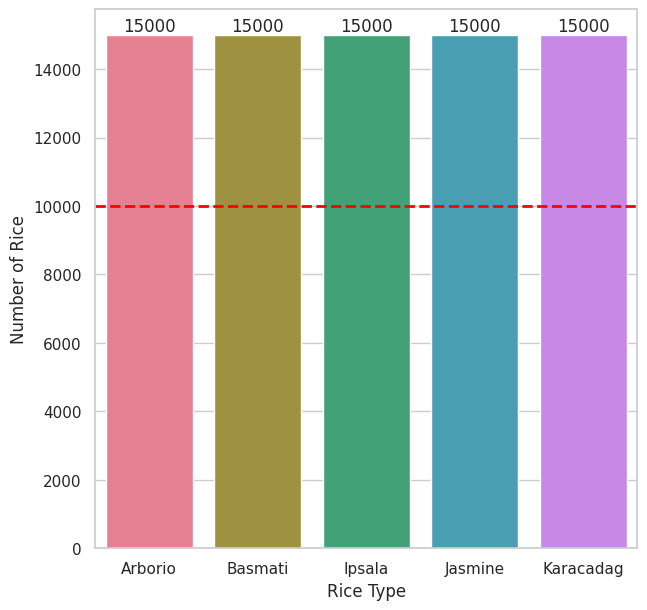

In [ ]:
plt.figure(figsize=(7,7))

sns.set_theme(style="whitegrid")
ax=sns.barplot(data=df_num, x="label",y="count",palette="husl",saturation=0.75)
plt.axhline(y=10000, color='red', linestyle='--', linewidth=2)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel("Rice Type")
plt.ylabel("Number of Rice")
plt.show()

# Images Visualitation

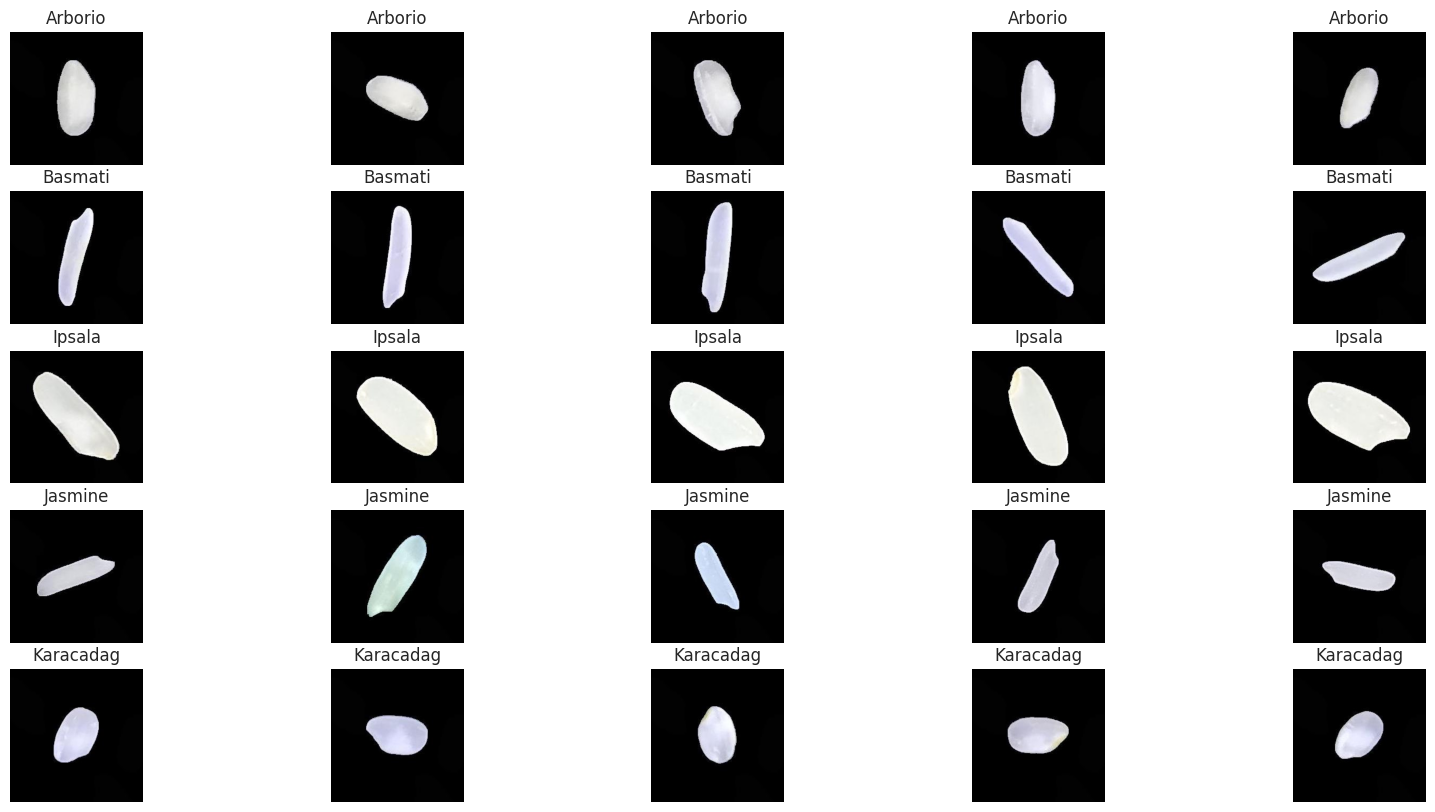

In [ ]:
import keras.utils as image
fig = plt.figure(figsize=(20,10))
count = 0
for j in range(5):
    for i in range(5):
        ax = fig.add_subplot(5, 5, j*5+1+i, xticks=[], yticks=[])

        plt.title(df_num["label"].iloc[j])
        all_files = os.listdir((data_path / df_num["label"].iloc[j]).as_posix())
        plt.axis("off")

        first_image_name = all_files[i]
        ax.imshow(image.load_img((data_path / df_num["label"].iloc[j] / first_image_name).as_posix()))

plt.show()